Connected to Python 3.10.12

In [1]:
import sys
print(sys.executable)

/bin/python3


In [2]:
import numpy as np

import tensorflow as tf
import tensorflow_probability as tfp

tfb = tfp.bijectors
tfd = tfp.distributions
tfk = tfp.math.psd_kernels

import matplotlib.pyplot as plt

sampling_seed = tfp.random.sanitize_seed(seed=146098)

2024-05-09 10:11:27.396172: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-09 10:11:27.399144: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-09 10:11:27.439750: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-09 10:11:28.299196: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


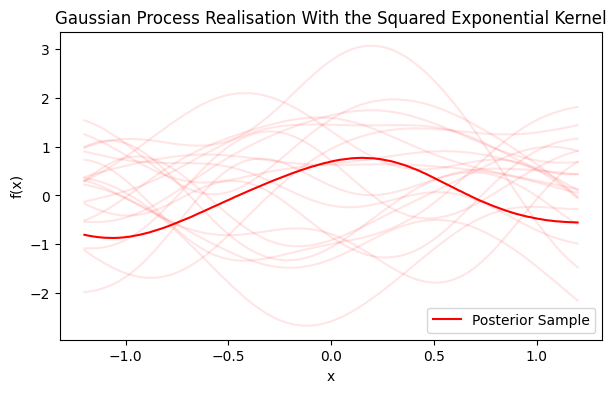

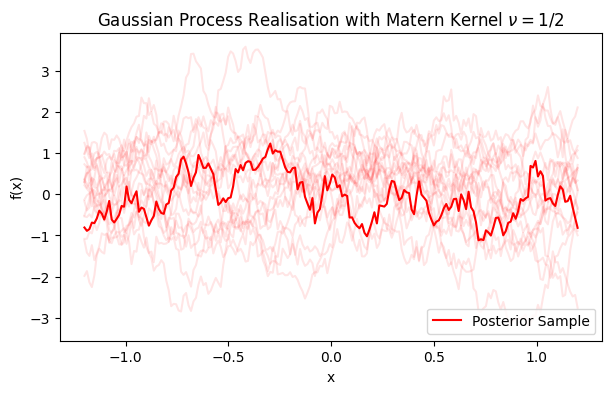

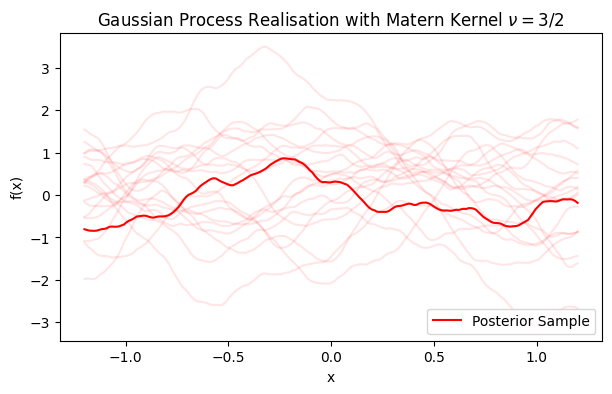

In [3]:
predictive_index_points_ = np.linspace(-1.2, 1.2, 200, dtype=np.float64)
predictive_index_points_ = predictive_index_points_[..., np.newaxis]

num_samples = 20

gp = tfd.GaussianProcess(
  kernel=tfk.ExponentiatedQuadratic(np.float64(1), np.float64(0.5)),
  index_points=predictive_index_points_,
)

samples = gp.sample(num_samples, seed = sampling_seed)

plt.figure(figsize=(7, 4))
for i in range(num_samples):
    plt.plot(
        predictive_index_points_,
        samples[i, :],
        c="r",
        alpha=0.1 + 0.9 * (i + 1 == num_samples),
        label="Posterior Sample" if i == 0 else None,
    )
leg = plt.legend(loc="lower right")
for lh in leg.legend_handles:
    lh.set_alpha(1)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title(r"Gaussian Process Realisation With the Squared Exponential Kernel")
plt.savefig("write_up/images/exponentiated_kernel.pdf")
plt.show()

gp = tfd.GaussianProcess(
  kernel=tfk.MaternOneHalf(np.float64(1), np.float64(0.5)),
  index_points=predictive_index_points_,
)

samples = gp.sample(num_samples, seed = sampling_seed)

plt.figure(figsize=(7, 4))
for i in range(num_samples):
    plt.plot(
        predictive_index_points_,
        samples[i, :],
        c="r",
        alpha=0.1 + 0.9 * (i + 1 == num_samples),
        label="Posterior Sample" if i == 0 else None,
    )
leg = plt.legend(loc="lower right")
for lh in leg.legend_handles:
    lh.set_alpha(1)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title(r"Gaussian Process Realisation with Matern Kernel $\nu = 1/2$")
plt.savefig("write_up/images/maternonehalf_kernel.pdf")
plt.show()

gp = tfd.GaussianProcess(
  kernel=tfk.MaternThreeHalves(np.float64(1), np.float64(0.5)),
  index_points=predictive_index_points_,
)

samples = gp.sample(num_samples, seed = sampling_seed)

plt.figure(figsize=(7, 4))
for i in range(num_samples):
    plt.plot(
        predictive_index_points_,
        samples[i, :],
        c="r",
        alpha=0.1 + 0.9 * (i + 1 == num_samples),
        label="Posterior Sample" if i == 0 else None,
    )
leg = plt.legend(loc="lower right")
for lh in leg.legend_handles:
    lh.set_alpha(1)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title(r"Gaussian Process Realisation with Matern Kernel $\nu = 3/2$")
plt.savefig("write_up/images/maternthreehalves_kernel.pdf")
plt.show()

gp = tfd.GaussianProcess(
  kernel=tfk.MaternFiveHalves(np.float64(1), np.float64(0.5)),
  index_points=predictive_index_points_,
)

samples = gp.sample(num_samples, seed = sampling_seed)

plt.figure(figsize=(7, 4))
for i in range(num_samples):
    plt.plot(
        predictive_index_points_,
        samples[i, :],
        c="r",
        alpha=0.1 + 0.9 * (i + 1 == num_samples),
        label="Posterior Sample" if i == 0 else None,
    )
leg = plt.legend(loc="lower right")
for lh in leg.legend_handles:
    lh.set_alpha(1)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title(r"Gaussian Process Realisation with Matern Kernel $\nu = 5/2$")
plt.savefig("write_up/images/maternfivehalves_kernel.pdf")
plt.show()

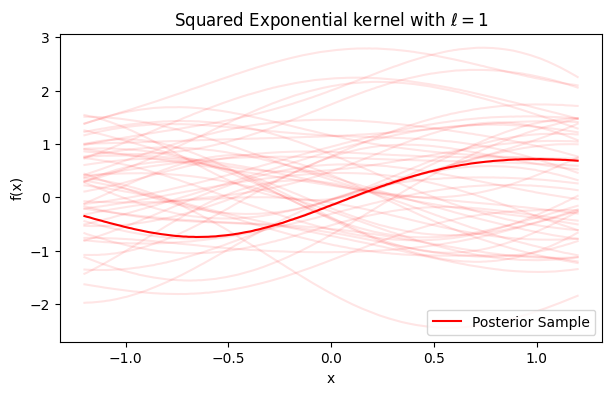

In [4]:
num_samples = 50

for ell in [0.5, 1, 2]:
    gp = tfd.GaussianProcess(
        kernel=tfk.ExponentiatedQuadratic(np.float64(1), np.float64(ell)),
        index_points=predictive_index_points_,
    )

    samples = gp.sample(num_samples, seed=sampling_seed)

    plt.figure(figsize=(7, 4))
    for i in range(num_samples):
        plt.plot(
            predictive_index_points_,
            samples[i, :],
            c="r",
            alpha=0.1 + 0.9 * (i + 1 == num_samples),
            label="Posterior Sample" if i == 0 else None,
        )
    leg = plt.legend(loc="lower right")
    for lh in leg.legend_handles:
        lh.set_alpha(1)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title(r"Squared Exponential kernel with $\ell = $" + str(ell))
    plt.savefig(
        "write_up/images/exponentiated_GP_ell_" + str(int(ell * 10)) + "_tenths.pdf"
    )
    plt.show()

In [5]:
flat_index = np.array([[-1], [0], [1]], dtype=np.float64)
easy_obs = np.array([0, 0, 1], dtype=np.float64)

plt.figure(figsize=(7, 4))
plt.scatter(flat_index[:, 0], easy_obs, label="Observations")
leg = plt.legend(loc="lower right")
for lh in leg.legend_handles:
    lh.set_alpha(1)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.ylim(-2, 2)
plt.title("Initial Points")
plt.savefig("write_up/images/flatish_GP_bare.pdf")
plt.show()

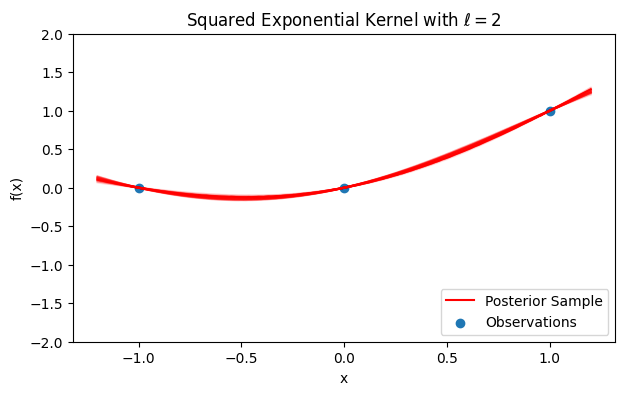

In [6]:
predictive_index_points_ = np.linspace(-1.2, 1.2, 200, dtype=np.float64)
predictive_index_points_ = predictive_index_points_[..., np.newaxis]
num_samples = 50

for ell in [0.5, 1, 2]:
    gprm = tfd.GaussianProcessRegressionModel(
        kernel=tfk.ExponentiatedQuadratic(np.float64(1), np.float64(ell)),
        index_points=predictive_index_points_,
        observation_index_points=flat_index,
        observations=easy_obs,
        predictive_noise_variance=0.0,
    )

    samples = gprm.sample(num_samples, seed = sampling_seed)

    plt.figure(figsize=(7, 4))
    for i in range(num_samples):
        plt.plot(
            predictive_index_points_,
            samples[i, :],
            c="r",
            alpha=0.1 + 0.9 * (i + 1 == num_samples),
            label="Posterior Sample" if i == 0 else None,
        )
    plt.scatter(flat_index[:, 0], easy_obs, label="Observations")
    leg = plt.legend(loc="lower right")
    for lh in leg.legend_handles:
        lh.set_alpha(1)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.ylim(-2, 2)
    plt.title(r"Squared Exponential Kernel with $\ell = $" + str(ell))
    plt.savefig("write_up/images/flatish_GP_ell_" + str(int(ell*10)) + "_tenths.pdf")
    plt.show()

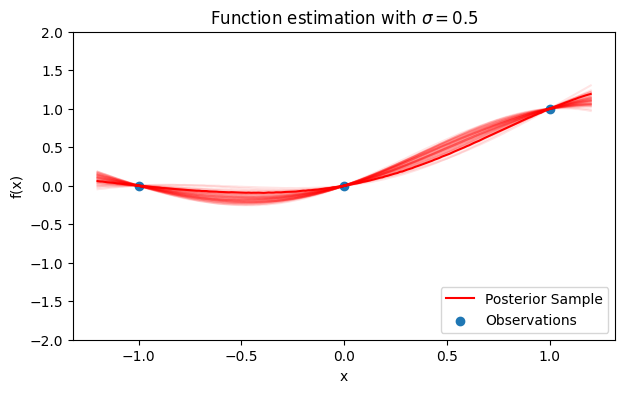

In [7]:
for sigma in [0.5, 1, 2]:
    gprm = tfd.GaussianProcessRegressionModel(
        kernel=tfk.ExponentiatedQuadratic(np.float64(sigma), np.float64(1)),
        index_points=predictive_index_points_,
        observation_index_points=flat_index,
        observations=easy_obs,
        predictive_noise_variance=0.0,
    )

    samples = gprm.sample(num_samples, seed = sampling_seed)

    plt.figure(figsize=(7, 4))
    for i in range(num_samples):
        plt.plot(
            predictive_index_points_,
            samples[i, :],
            c="r",
            alpha=0.1 + 0.9 * (i + 1 == num_samples),
            label="Posterior Sample" if i == 0 else None,
        )
    plt.scatter(flat_index[:, 0], easy_obs, label="Observations")
    leg = plt.legend(loc="lower right")
    for lh in leg.legend_handles:
        lh.set_alpha(1)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.ylim(-2, 2)
    plt.title(r"Function estimation with $\sigma = $" + str(sigma))
    plt.savefig("write_up/images/flatish_GP_sigma_" + str(sigma*10) + "_tenths.pdf")
    plt.show()

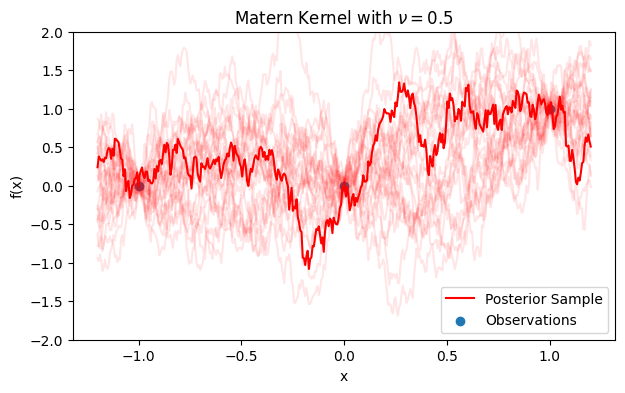

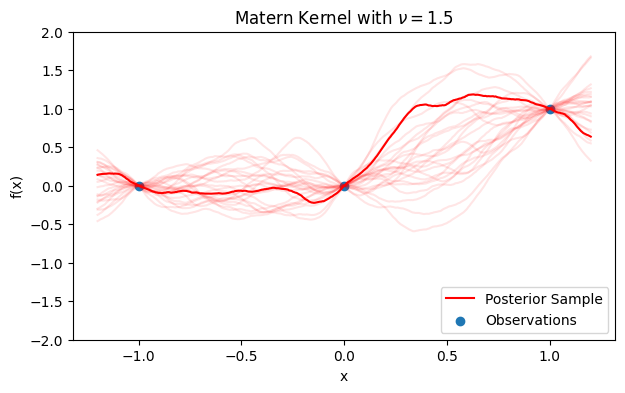

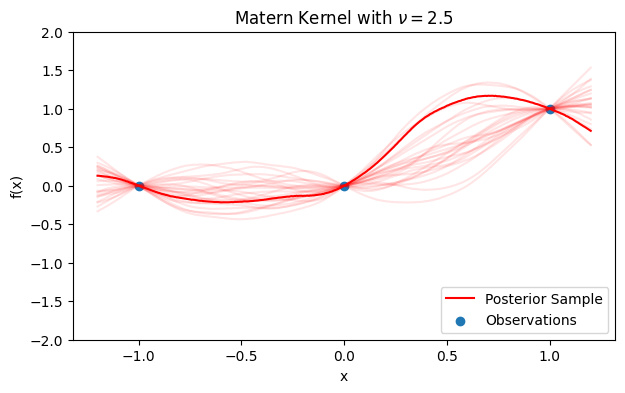

In [8]:
predictive_index_points_ = np.linspace(-1.2, 1.2, 400, dtype=np.float64)
predictive_index_points_ = predictive_index_points_[..., np.newaxis]

for nu in [0.5, 1.5, 2.5]:
    gprm = tfd.GaussianProcessRegressionModel(
        kernel=tfk.GeneralizedMatern(nu, np.float64(1), np.float64(1)),
        index_points=predictive_index_points_,
        observation_index_points=flat_index,
        observations=easy_obs,
        predictive_noise_variance=0.0,
    )

    samples = gprm.sample(num_samples / 2, seed=sampling_seed)

    plt.figure(figsize=(7, 4))
    for i in range(int(num_samples / 2)):
        plt.plot(
            predictive_index_points_,
            samples[i, :],
            c="r",
            alpha=0.1 + 0.9 * (i + 1 == int(num_samples / 2)),
            label="Posterior Sample" if i == 0 else None,
        )
    plt.scatter(flat_index[:, 0], easy_obs, label="Observations", alpha=1)
    leg = plt.legend(loc="lower right")
    for lh in leg.legend_handles:
        lh.set_alpha(1)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.ylim(-2, 2)
    plt.title(r"Matern Kernel with $\nu = $" + str(nu))
    plt.savefig("write_up/images/flatish_GP_matern_" + str(nu * 10) + "_tenths.pdf")
    plt.show()

In [9]:
my_seed = np.random.default_rng(seed=591)  # For replicability


def cub_fn(x):
  return x[..., 0] * (x[..., 0] - 1) * (x[..., 0] + 1)

ind_range = 10
cub_index_vals = np.expand_dims(  # this makes the size of the sample (3,1)
  my_seed.uniform(low=-1.0, high=1.0, size=ind_range), axis=-1  # last axis
)

cub_obs_vals = cub_fn(cub_index_vals)

my_GP = tfd.GaussianProcess(
  kernel=tfk.ExponentiatedQuadratic(
    amplitude=tf.Variable(1.0, dtype=np.float64, name="amplitude"),
    length_scale=tf.Variable(1.0, dtype=np.float64, name="length_scale"),
  ),
  index_points=cub_index_vals,
)

print(my_GP.trainable_variables[1])

Adam_optim = tf.optimizers.Adam()

<tf.Variable 'length_scale:0' shape=() dtype=float64, numpy=1.0>


In [10]:
@tf.function()
def optimize():
  with tf.GradientTape() as tape:
    loss = -my_GP.log_prob(cub_obs_vals)
  grads = tape.gradient(loss, my_GP.trainable_variables)
  Adam_optim.apply_gradients(zip(grads, my_GP.trainable_variables))
  return loss


num_iters = 7000

lls_ = np.zeros(num_iters, np.float64)
for i in range(num_iters):
  loss = optimize()
  lls_[i] = loss

amp_fin = my_GP.trainable_variables[0].numpy()
len_fin = my_GP.trainable_variables[1].numpy()

print("Trained parameters:")
print("amplitude: {}".format(amp_fin))
print("length_scale: {}".format(len_fin))

Trained parameters:
amplitude: 0.9617273511898726
length_scale: 0.7243328582539419


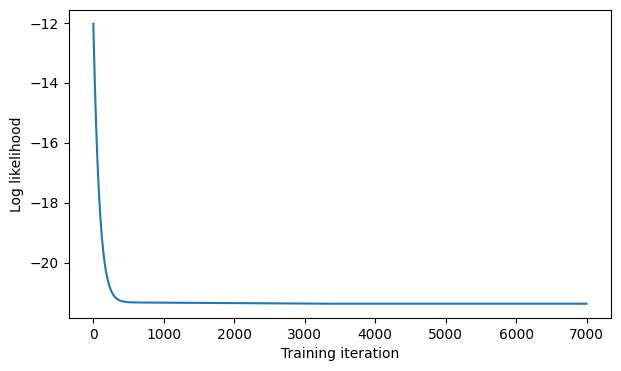

In [11]:
plt.figure(figsize=(7, 4))
plt.plot(lls_)
plt.xlabel("Training iteration")
plt.ylabel("Log likelihood")
plt.show()

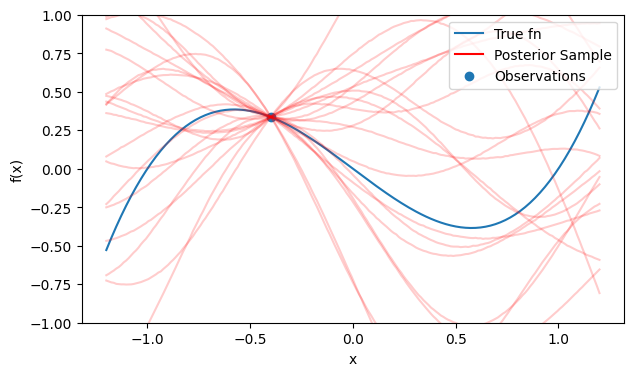

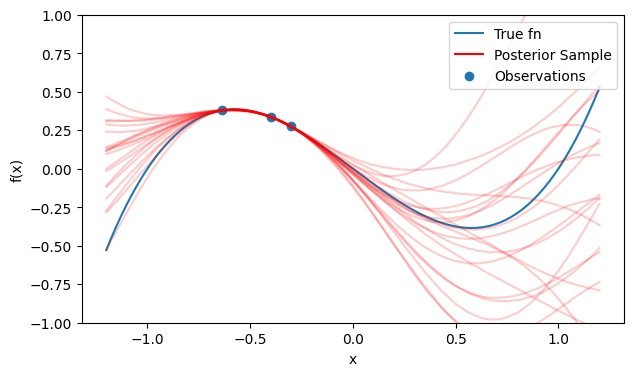

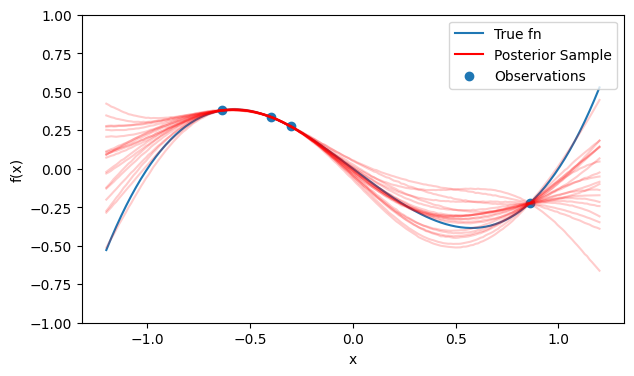

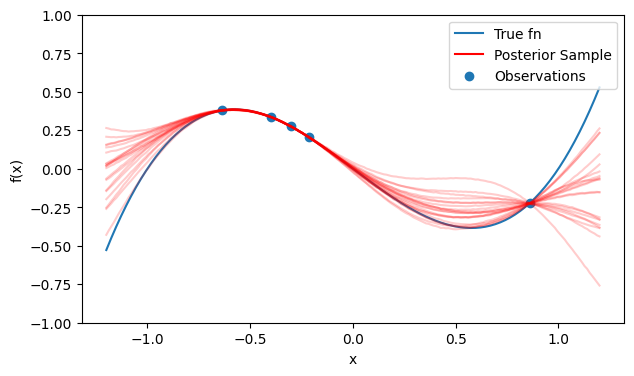

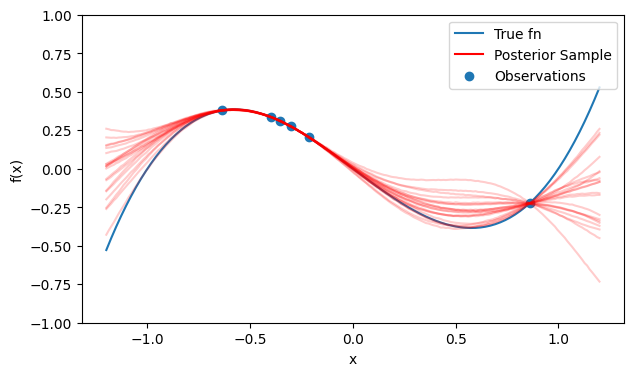

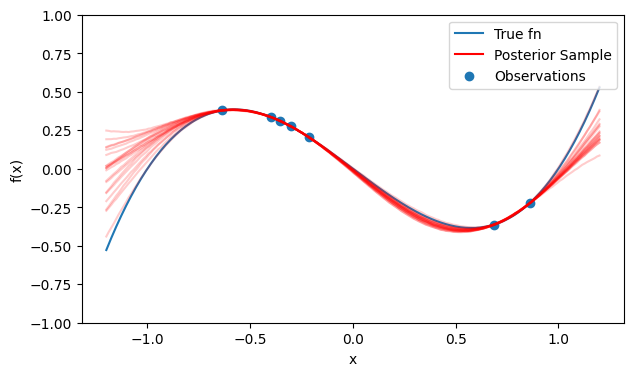

In [12]:
predictive_index_points_ = np.linspace(-1.2, 1.2, 200, dtype=np.float64)

# Reshape to [200, 1] -- 1 is the dimensionality of the feature space.
predictive_index_points_ = predictive_index_points_[..., np.newaxis]

optimized_kernel = tfk.ExponentiatedQuadratic(amp_fin, len_fin)
num_samples = 20

for ind in range(ind_range):
  gprm = tfd.GaussianProcessRegressionModel(
    kernel=optimized_kernel,
    index_points=predictive_index_points_,
    observation_index_points=cub_index_vals[range(ind+1)],
    observations=cub_obs_vals[range(ind+1)],
    predictive_noise_variance=0.0,
  )

  samples = gprm.sample(num_samples, seed = sampling_seed)

  plt.figure(figsize=(7, 4))
  plt.plot(predictive_index_points_, cub_fn(predictive_index_points_),
    label='True fn')
  for i in range(num_samples):
    plt.plot(predictive_index_points_, samples[i, :], c='r', alpha=.2,
      label='Posterior Sample' if i == 0 else None)
  plt.scatter(cub_index_vals[range(ind+1)], cub_obs_vals[range(ind+1)],
    label='Observations')
  leg = plt.legend(loc='upper right')
  for lh in leg.legend_handles:
    lh.set_alpha(1)
  plt.xlabel("x")
  plt.ylabel("f(x)")
  plt.ylim(-1, 1)
  # plt.title(r"Function estimation with GP")
  plt.savefig("write_up/images/cub_GP_" + str(ind + 1) + "_iters.pdf")
  plt.show()

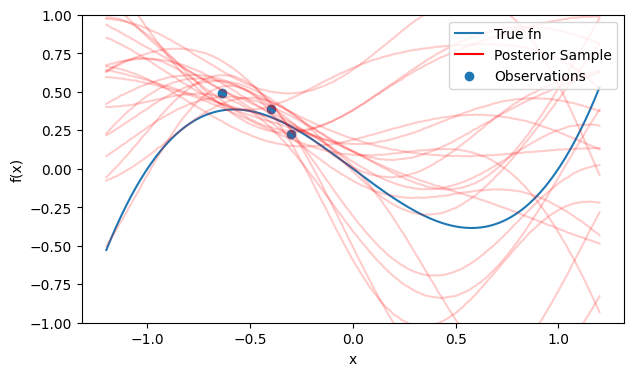

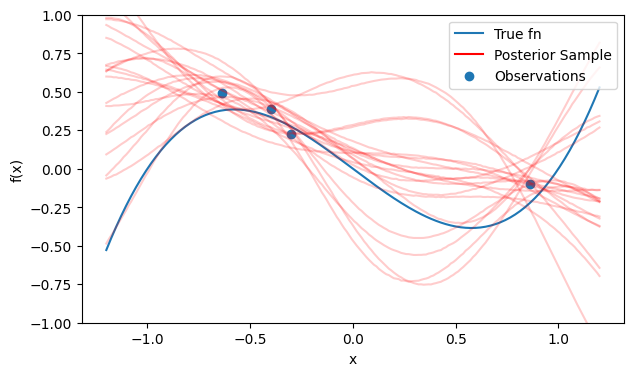

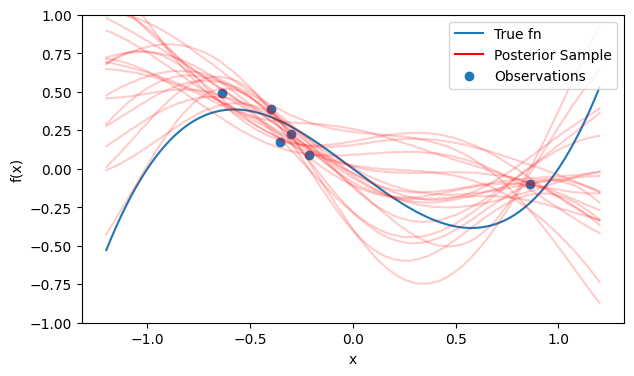

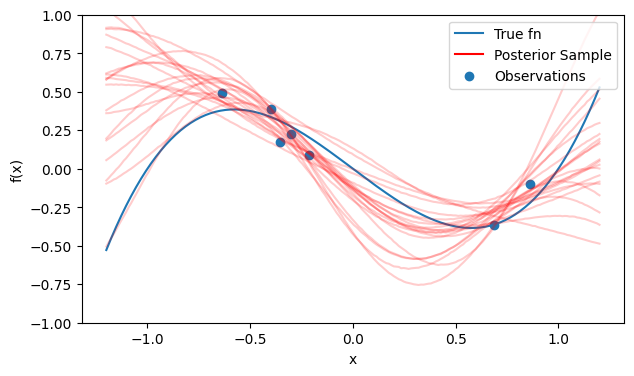

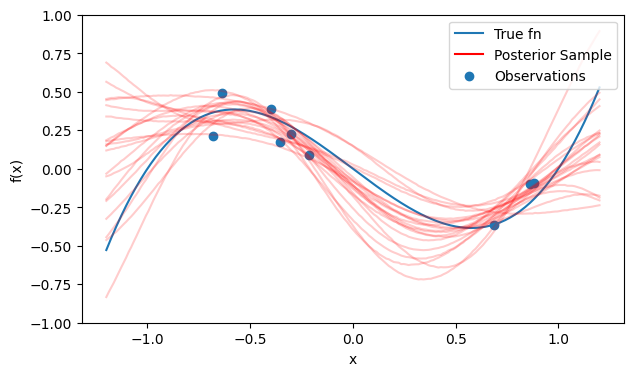

In [13]:
num_obs_err = 20

my_seed_err = np.random.default_rng(seed=914)

# cub_obs_vals_err = cub_obs_vals + my_seed.normal(
#         scale=0.1, size=num_obs_err
#     )

def cub_fn_err(x):
    return x[..., 0] * (x[..., 0] - 1) * (x[..., 0] + 1) + my_seed.normal(
        scale=0.1, size=ind_range
    )


cub_obs_vals_err = cub_fn_err(cub_index_vals)

for ind in range(ind_range):
    gprm = tfd.GaussianProcessRegressionModel(
        kernel=optimized_kernel,
        index_points=predictive_index_points_,
        observation_index_points=cub_index_vals[range(ind + 1)],
        observations=cub_obs_vals_err[range(ind + 1)],
        observation_noise_variance=tf.Variable(
            0.01, dtype=np.float64, name="observation_noise_variance_err"
        ),
        predictive_noise_variance=0.0,
    )

    samples = gprm.sample(num_samples, seed=sampling_seed)

    plt.figure(figsize=(7, 4))
    plt.plot(
        predictive_index_points_, cub_fn(predictive_index_points_), label="True fn"
    )
    for i in range(num_samples):
        plt.plot(
            predictive_index_points_,
            samples[i, :],
            c="r",
            alpha=0.2,
            label="Posterior Sample" if i == 0 else None,
        )
    plt.scatter(
        cub_index_vals[range(ind + 1)],
        cub_obs_vals_err[range(ind + 1)],
        label="Observations",
    )
    leg = plt.legend(loc="upper right")
    for lh in leg.legend_handles:
        lh.set_alpha(1)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.ylim(-1, 1)
    # plt.title(r"Function estimation with GP")
    plt.savefig("write_up/images/cub_GP_err_" + str(ind + 1) + "_iters.pdf")
    plt.show()

In [14]:
Adam_optim = tf.optimizers.Adam() # somehow need this again? maybe when you do the optimize function it stores info?

@tf.function()
def optimize_err():
  with tf.GradientTape() as tape:
    loss = -my_GP_err.log_prob(cub_obs_vals_err)
  grads = tape.gradient(loss, my_GP_err.trainable_variables)
  Adam_optim.apply_gradients(zip(grads, my_GP_err.trainable_variables))
  return loss


num_iters_err = 5000

lls_err = np.zeros(num_iters_err, np.float64)
for i in range(num_iters_err):
  loss_err = optimize_err()
  lls_err[i] = loss_err

amp_fin_err = my_GP_err.trainable_variables[0].numpy()
len_fin_err = my_GP_err.trainable_variables[1].numpy()
obs_var_fin_err = my_GP_err.trainable_variables[2].numpy()

print('Trained parameters:')
print('amplitude_err: {}'.format(amp_fin))
print('length_scale_err: {}'.format(len_fin))
print('observation_noise_variance_err: {}'.format(obs_var_fin_err))

plt.figure(figsize=(7, 4))
plt.plot(lls_err)
plt.xlabel("Training iteration")
plt.ylabel("Log likelihood")
plt.show()

NameError: in user code:

    File "<ipython-input-14-41bc9ffcf06b>", line 6, in optimize_err  *
        loss = -my_GP_err.log_prob(cub_obs_vals_err)

    NameError: name 'my_GP_err' is not defined


In [15]:
predictive_index_points_

array([[-1.2       ],
       [-1.1879397 ],
       [-1.1758794 ],
       [-1.1638191 ],
       [-1.15175879],
       [-1.13969849],
       [-1.12763819],
       [-1.11557789],
       [-1.10351759],
       [-1.09145729],
       [-1.07939698],
       [-1.06733668],
       [-1.05527638],
       [-1.04321608],
       [-1.03115578],
       [-1.01909548],
       [-1.00703518],
       [-0.99497487],
       [-0.98291457],
       [-0.97085427],
       [-0.95879397],
       [-0.94673367],
       [-0.93467337],
       [-0.92261307],
       [-0.91055276],
       [-0.89849246],
       [-0.88643216],
       [-0.87437186],
       [-0.86231156],
       [-0.85025126],
       [-0.83819095],
       [-0.82613065],
       [-0.81407035],
       [-0.80201005],
       [-0.78994975],
       [-0.77788945],
       [-0.76582915],
       [-0.75376884],
       [-0.74170854],
       [-0.72964824],
       [-0.71758794],
       [-0.70552764],
       [-0.69346734],
       [-0.68140704],
       [-0.66934673],
       [-0

In [16]:
UCB_index_points = [[0]]
UCB_obs_points = [[cub_fn_err(0)]]

next_point = tfp.util.TransformedVariable(initial_value = 0, bijector = tfb.Sigmoid(-1., 1), dtype=np.float64)

def UCB_loss():
  next_guess = tf.reshape(
      tf.stack(
          [next_alpha, next_beta, next_gamma_L, next_lambda, next_f, next_r]
      ),
      [1, 6],
  )
  mean_t = champ_GP_reg.mean_fn(next_guess)
  std_t = champ_GP_reg.stddev(index_points=next_guess)
  return tf.squeeze(mean_t - std_t)

def update_var_UCB():
    optimizer_fast = tf.optimizers.Adam(learning_rate=1.0)

    @tf.function(autograph=False, jit_compile=False)
    def opt_var():
        with tf.GradientTape() as tape:
            loss = UCB_loss()
        grads = tape.gradient(loss, next_vars)
        optimizer_fast.apply_gradients(zip(grads, next_vars))
        return loss

    num_iters = 10000

    lls_ = np.zeros(num_iters, np.float64)
    tolerance = 1e-6  # Set your desired tolerance level
    previous_loss = float("inf")

    for i in range(num_iters):
        loss = opt_var()
        lls_[i] = loss

        # Check if change in loss is less than tolerance
        if abs(loss - previous_loss) < tolerance:
            print(f"Acquisition function convergence reached at iteration {i+1}.")
            lls_ = lls_[range(i + 1)]
            break

        previous_loss = loss

    next_guess = tf.reshape(
        tf.stack([next_alpha, next_beta, next_gamma_L, next_lambda, next_f, next_r]),
        [1, 6],
    )
    print(
        "The final UCB loss was {}".format(loss.numpy().round(3))
        + " with predicted mean of {}".format(
            champ_GP_reg.mean_fn(next_guess).numpy().round(3)
        )
    )
    for var in optimizer_fast.variables:
        var.assign(tf.zeros_like(var))

TypeError: 'int' object is not subscriptable

In [17]:
UCB_index_points = [[0]]
UCB_obs_points = [[cub_fn_err(0)]]

TypeError: 'int' object is not subscriptable

In [18]:
UCB_index_points = [[0]]

In [19]:
UCB_obs_points

NameError: name 'UCB_obs_points' is not defined

In [20]:
UCB_index_points = [[0]]

In [21]:
UCB_index_points

[[0]]

In [22]:
cub_obs_vals_err

array([ 0.39009141,  0.2240003 ,  0.48856862, -0.10227989,  0.09035895,
        0.17358159, -0.36746546,  0.21260618, -0.09536218,  0.04842568])

In [23]:
cub_fn_err

<function __main__.cub_fn_err(x)>

In [24]:
cub_fn_err

<function __main__.cub_fn_err(x)>

In [25]:
cub_index_vals

array([[-0.39951921],
       [-0.30222656],
       [-0.63894354],
       [ 0.85946318],
       [-0.21374915],
       [-0.35558108],
       [ 0.68539076],
       [-0.68321013],
       [ 0.88048732],
       [-0.92611318]])

In [26]:

UCB_index_points = [[0.]]
UCB_obs_points = cub_fn_err(UCB_index_points)

TypeError: list indices must be integers or slices, not tuple

In [27]:
UCB_index_points

[[0.0]]

In [28]:
UCB_index_points = [[0.],]

In [29]:
UCB_obs_points = cub_fn_err(UCB_index_points)

TypeError: list indices must be integers or slices, not tuple

In [30]:
UCB_index_points

[[0.0]]

In [31]:
UCB_index_points.shape

AttributeError: 'list' object has no attribute 'shape'

In [32]:
cub_fn_err(0.)

TypeError: 'float' object is not subscriptable

In [33]:
cub_fn_err([[0.,],])

TypeError: list indices must be integers or slices, not tuple

In [34]:
cub_fn_err([[0.,],[1.,]])

TypeError: list indices must be integers or slices, not tuple

In [35]:
cub_fn_err([[0.],[1.]])

TypeError: list indices must be integers or slices, not tuple

In [36]:
cub_index_vals

array([[-0.39951921],
       [-0.30222656],
       [-0.63894354],
       [ 0.85946318],
       [-0.21374915],
       [-0.35558108],
       [ 0.68539076],
       [-0.68321013],
       [ 0.88048732],
       [-0.92611318]])

In [37]:
UCB_index_points

[[0.0]]

In [38]:

UCB_index_points = np.array([[0.]])
UCB_obs_points = cub_fn_err(UCB_index_points)

In [39]:
UCB_obs_points

array([ 0.22187942,  0.01644553,  0.09468822, -0.00435457, -0.11211735,
        0.04278297,  0.08712096,  0.08580897,  0.02490392, -0.15970599])

In [40]:
UCB_index_points

array([[0.]])

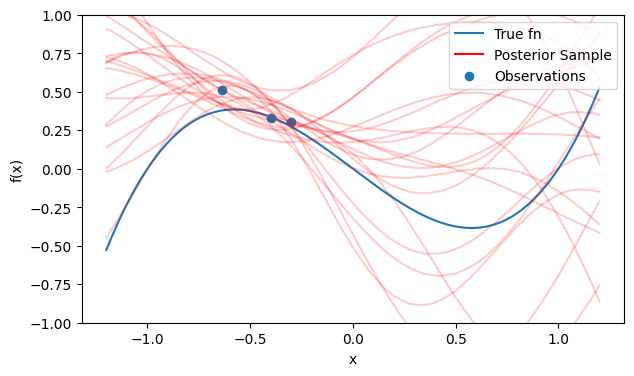

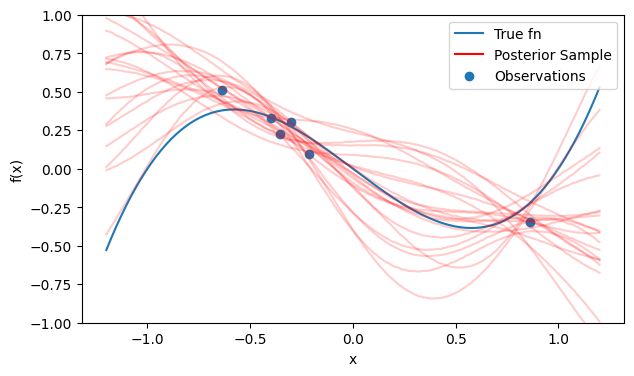

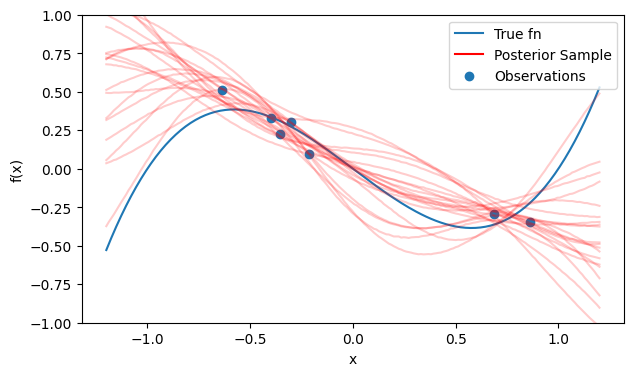

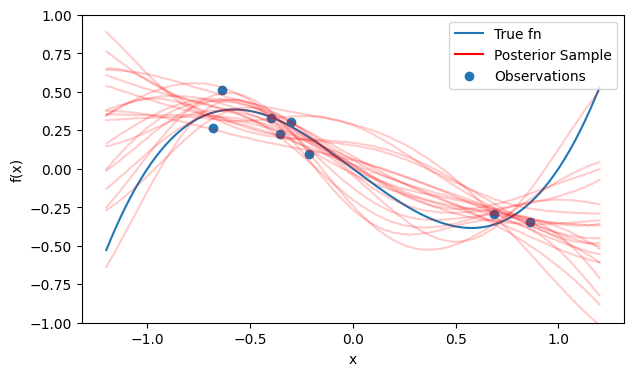

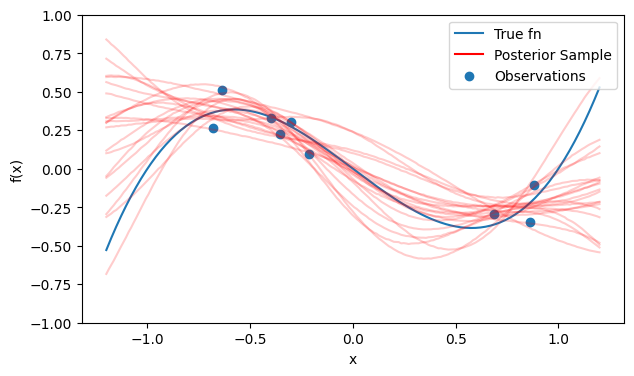

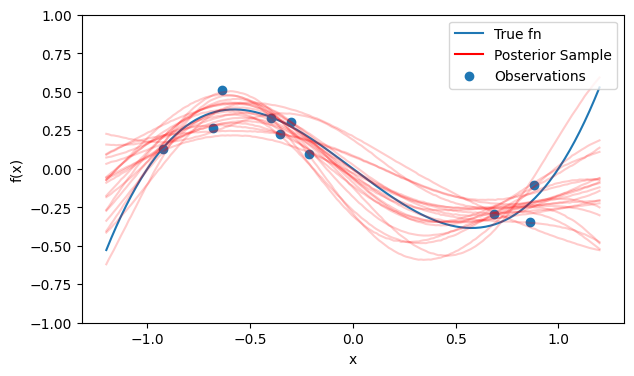

In [41]:
num_obs_err = 20

my_seed_err = np.random.default_rng(seed=914)

# cub_obs_vals_err = cub_obs_vals + my_seed.normal(
#         scale=0.1, size=num_obs_err
#     )

def cub_fn_err(x):
    return x[..., 0] * (x[..., 0] - 1) * (x[..., 0] + 1) + my_seed.normal(
        scale=0.1, size=x.shape[0]
    )


cub_obs_vals_err = cub_fn_err(cub_index_vals)

for ind in range(ind_range):
    gprm = tfd.GaussianProcessRegressionModel(
        kernel=optimized_kernel,
        index_points=predictive_index_points_,
        observation_index_points=cub_index_vals[range(ind + 1)],
        observations=cub_obs_vals_err[range(ind + 1)],
        observation_noise_variance=tf.Variable(
            0.01, dtype=np.float64, name="observation_noise_variance_err"
        ),
        predictive_noise_variance=0.0,
    )

    samples = gprm.sample(num_samples, seed=sampling_seed)

    plt.figure(figsize=(7, 4))
    plt.plot(
        predictive_index_points_, cub_fn(predictive_index_points_), label="True fn"
    )
    for i in range(num_samples):
        plt.plot(
            predictive_index_points_,
            samples[i, :],
            c="r",
            alpha=0.2,
            label="Posterior Sample" if i == 0 else None,
        )
    plt.scatter(
        cub_index_vals[range(ind + 1)],
        cub_obs_vals_err[range(ind + 1)],
        label="Observations",
    )
    leg = plt.legend(loc="upper right")
    for lh in leg.legend_handles:
        lh.set_alpha(1)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.ylim(-1, 1)
    # plt.title(r"Function estimation with GP")
    plt.savefig("write_up/images/cub_GP_err_" + str(ind + 1) + "_iters.pdf")
    plt.show()

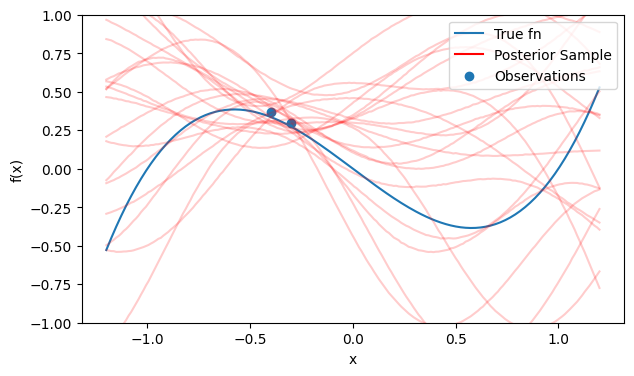

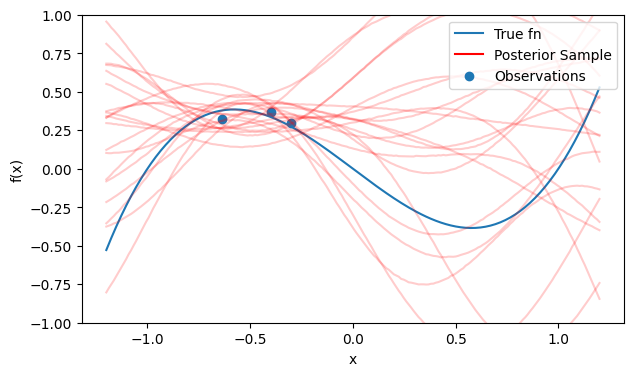

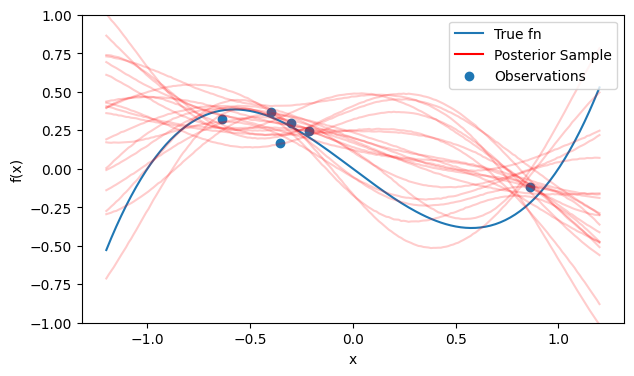

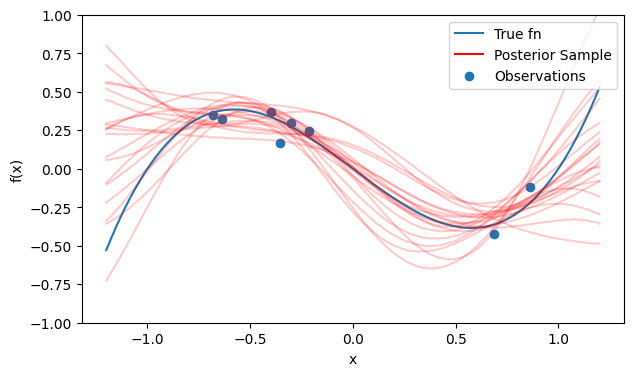

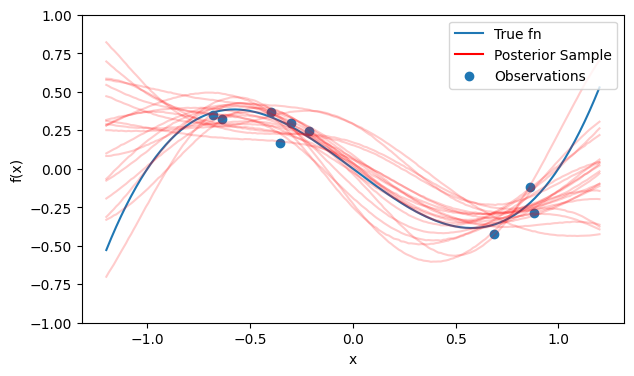

In [42]:
num_obs_err = 20

my_seed_err = np.random.default_rng(seed=914)

# cub_obs_vals_err = cub_obs_vals + my_seed.normal(
#         scale=0.1, size=num_obs_err
#     )

def cub_fn_err(x):
    return x[..., 0] * (x[..., 0] - 1) * (x[..., 0] + 1) + my_seed.normal(
        scale=0.1, size=x.shape[0]
    )


cub_obs_vals_err = cub_fn_err(cub_index_vals)

for ind in range(ind_range):
    gprm = tfd.GaussianProcessRegressionModel(
        kernel=optimized_kernel,
        index_points=predictive_index_points_,
        observation_index_points=cub_index_vals[range(ind + 1)],
        observations=cub_obs_vals_err[range(ind + 1)],
        observation_noise_variance=tf.Variable(
            0.01, dtype=np.float64, name="observation_noise_variance_err"
        ),
        predictive_noise_variance=0.0,
    )

    samples = gprm.sample(num_samples, seed=sampling_seed)

    plt.figure(figsize=(7, 4))
    plt.plot(
        predictive_index_points_, cub_fn(predictive_index_points_), label="True fn"
    )
    for i in range(num_samples):
        plt.plot(
            predictive_index_points_,
            samples[i, :],
            c="r",
            alpha=0.2,
            label="Posterior Sample" if i == 0 else None,
        )
    plt.scatter(
        cub_index_vals[range(ind + 1)],
        cub_obs_vals_err[range(ind + 1)],
        label="Observations",
    )
    leg = plt.legend(loc="upper right")
    for lh in leg.legend_handles:
        lh.set_alpha(1)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.ylim(-1, 1)
    # plt.title(r"Function estimation with GP")
    plt.savefig("write_up/images/cub_GP_err_" + str(ind + 1) + "_iters.pdf")
    plt.show()

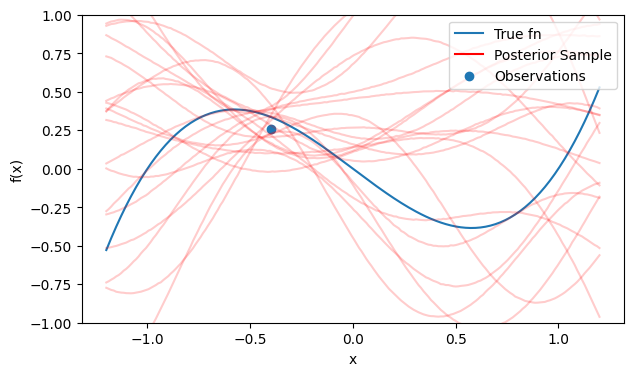

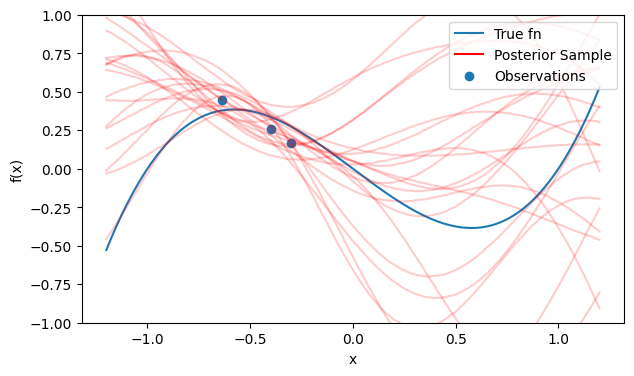

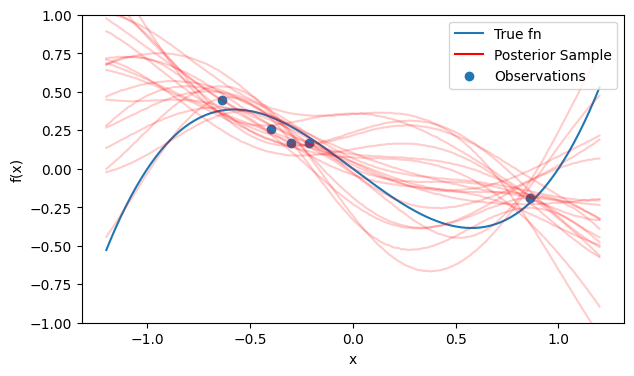

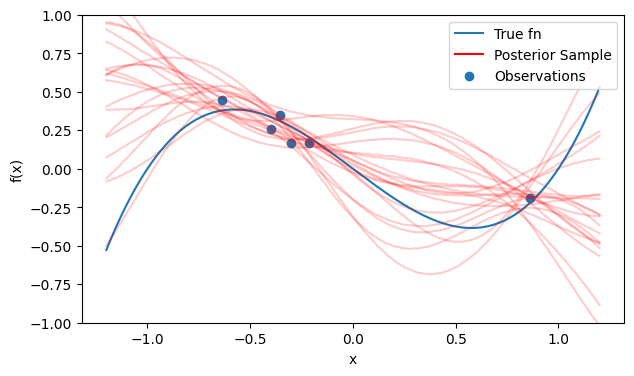

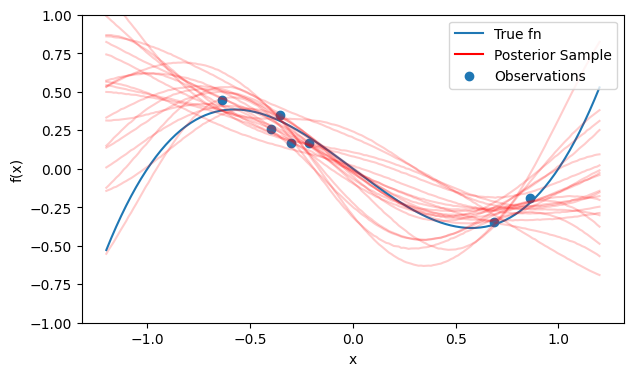

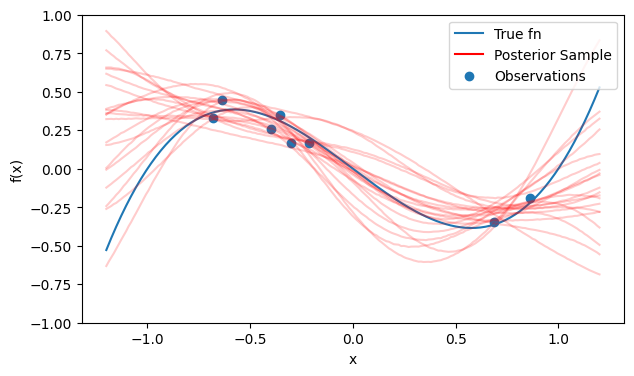

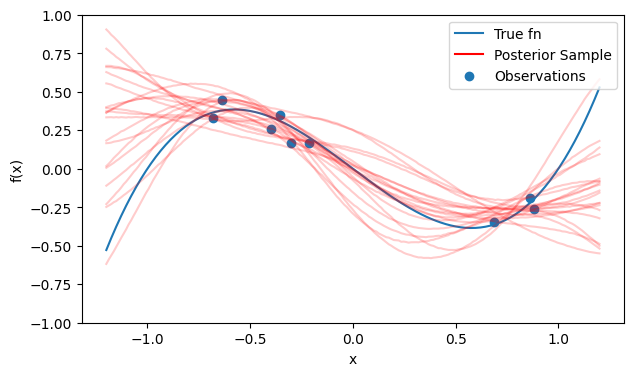

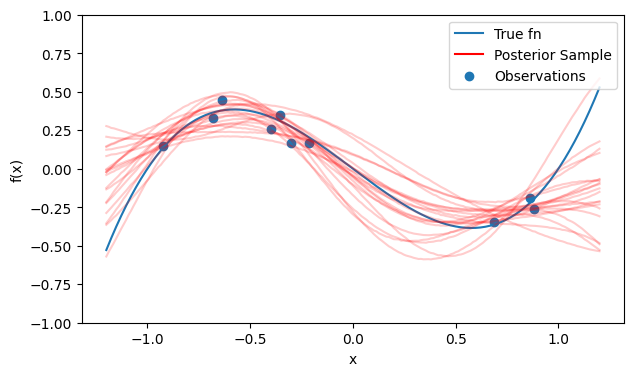

In [43]:
num_obs_err = 20

my_seed_err = np.random.default_rng(seed=914)

# cub_obs_vals_err = cub_obs_vals + my_seed.normal(
#         scale=0.1, size=num_obs_err
#     )

def cub_fn_err(x):
    return x[..., 0] * (x[..., 0] - 1) * (x[..., 0] + 1) + my_seed.normal(
        scale=0.1, size=x.shape[0]
    )


cub_obs_vals_err = cub_fn_err(cub_index_vals)

for ind in range(ind_range):
    gprm = tfd.GaussianProcessRegressionModel(
        kernel=optimized_kernel,
        index_points=predictive_index_points_,
        observation_index_points=cub_index_vals[range(ind + 1)],
        observations=cub_obs_vals_err[range(ind + 1)],
        observation_noise_variance=tf.Variable(
            0.01, dtype=np.float64, name="observation_noise_variance_err"
        ),
        predictive_noise_variance=0.0,
    )

    samples = gprm.sample(num_samples, seed=sampling_seed)

    plt.figure(figsize=(7, 4))
    plt.plot(
        predictive_index_points_, cub_fn(predictive_index_points_), label="True fn"
    )
    for i in range(num_samples):
        plt.plot(
            predictive_index_points_,
            samples[i, :],
            c="r",
            alpha=0.2,
            label="Posterior Sample" if i == 0 else None,
        )
    plt.scatter(
        cub_index_vals[range(ind + 1)],
        cub_obs_vals_err[range(ind + 1)],
        label="Observations",
    )
    leg = plt.legend(loc="upper right")
    for lh in leg.legend_handles:
        lh.set_alpha(1)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.ylim(-1, 1)
    # plt.title(r"Function estimation with GP")
    plt.savefig("write_up/images/cub_GP_err_" + str(ind + 1) + "_iters.pdf")
    plt.show()

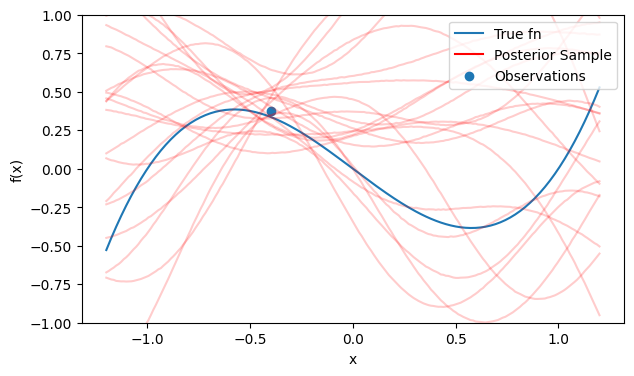

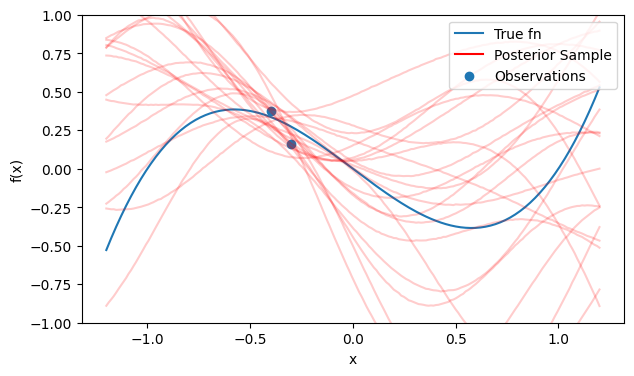

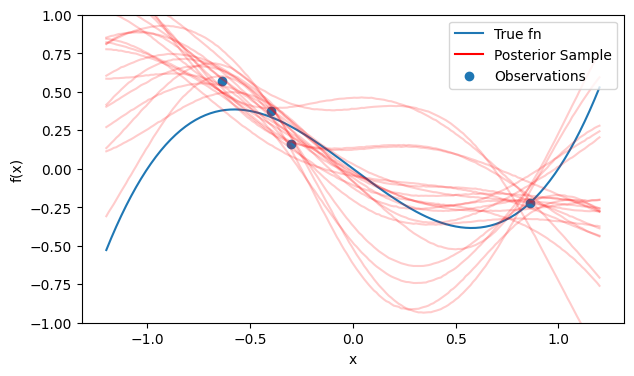

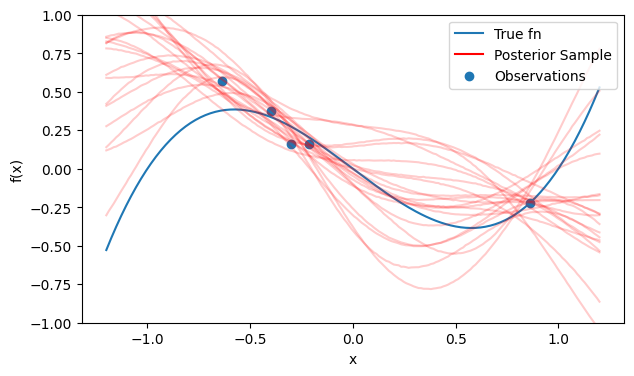

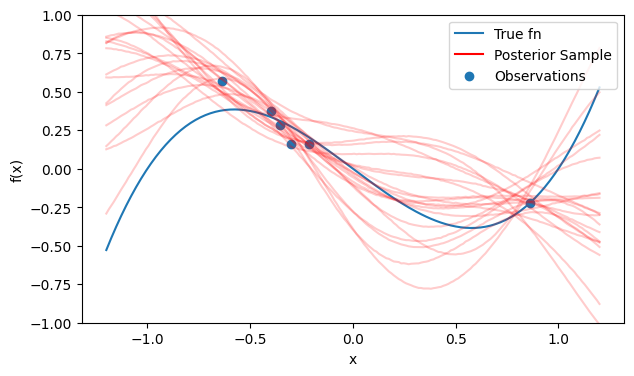

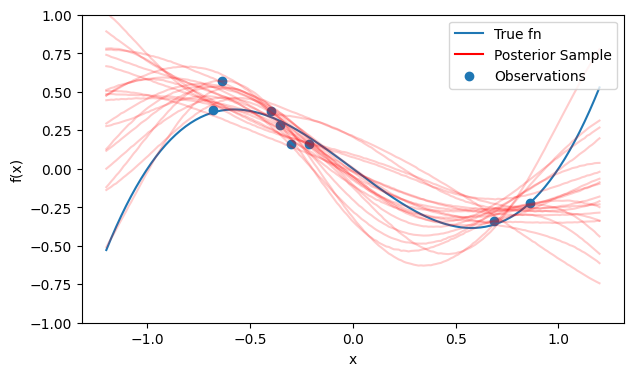

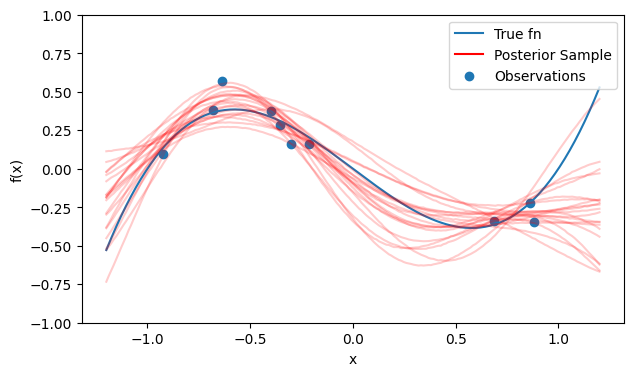

In [44]:
num_obs_err = 20

my_seed_err = np.random.default_rng(seed=914)

# cub_obs_vals_err = cub_obs_vals + my_seed.normal(
#         scale=0.1, size=num_obs_err
#     )

def cub_fn_err(x):
    return x[..., 0] * (x[..., 0] - 1) * (x[..., 0] + 1) + my_seed_err.normal(
        scale=0.1, size=x.shape[0]
    )


cub_obs_vals_err = cub_fn_err(cub_index_vals)

for ind in range(ind_range):
    gprm = tfd.GaussianProcessRegressionModel(
        kernel=optimized_kernel,
        index_points=predictive_index_points_,
        observation_index_points=cub_index_vals[range(ind + 1)],
        observations=cub_obs_vals_err[range(ind + 1)],
        observation_noise_variance=tf.Variable(
            0.01, dtype=np.float64, name="observation_noise_variance_err"
        ),
        predictive_noise_variance=0.0,
    )

    samples = gprm.sample(num_samples, seed=sampling_seed)

    plt.figure(figsize=(7, 4))
    plt.plot(
        predictive_index_points_, cub_fn(predictive_index_points_), label="True fn"
    )
    for i in range(num_samples):
        plt.plot(
            predictive_index_points_,
            samples[i, :],
            c="r",
            alpha=0.2,
            label="Posterior Sample" if i == 0 else None,
        )
    plt.scatter(
        cub_index_vals[range(ind + 1)],
        cub_obs_vals_err[range(ind + 1)],
        label="Observations",
    )
    leg = plt.legend(loc="upper right")
    for lh in leg.legend_handles:
        lh.set_alpha(1)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.ylim(-1, 1)
    # plt.title(r"Function estimation with GP")
    plt.savefig("write_up/images/cub_GP_err_" + str(ind + 1) + "_iters.pdf")
    plt.show()

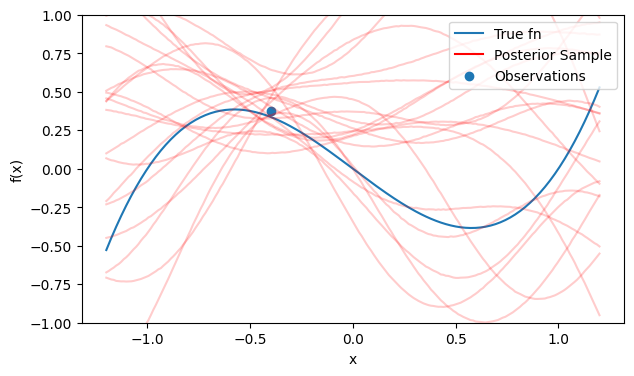

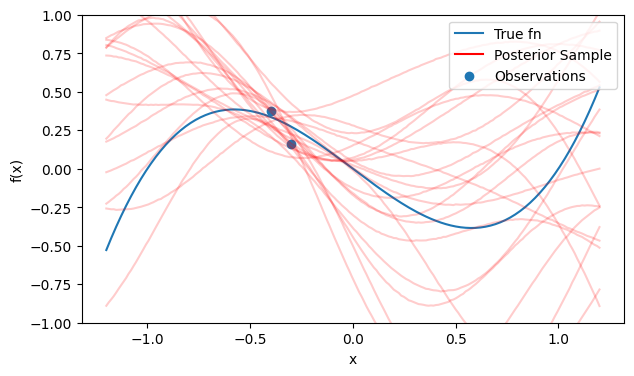

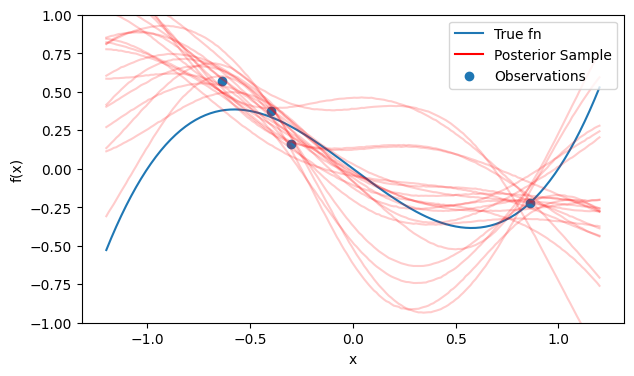

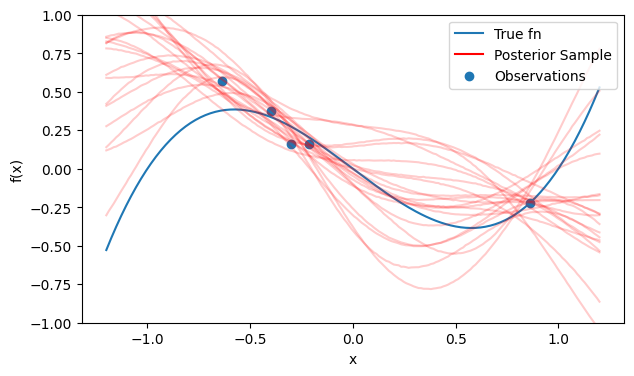

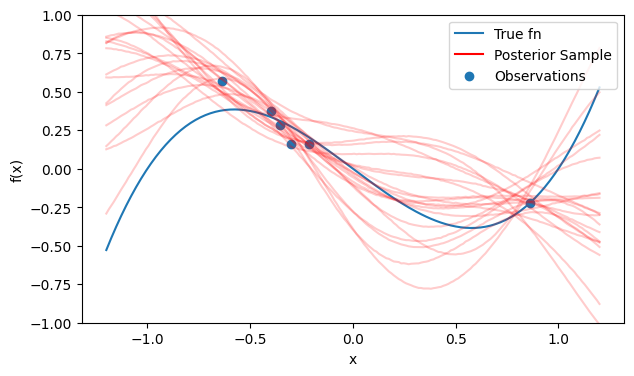

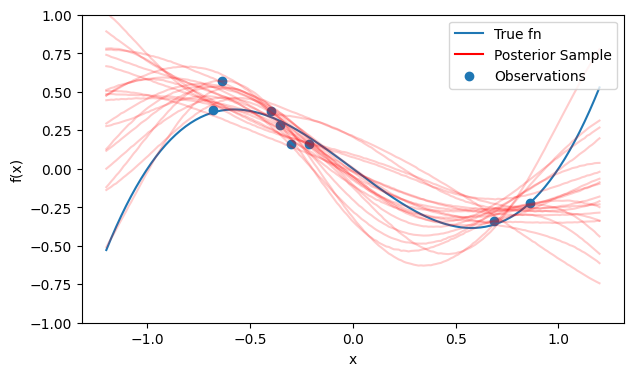

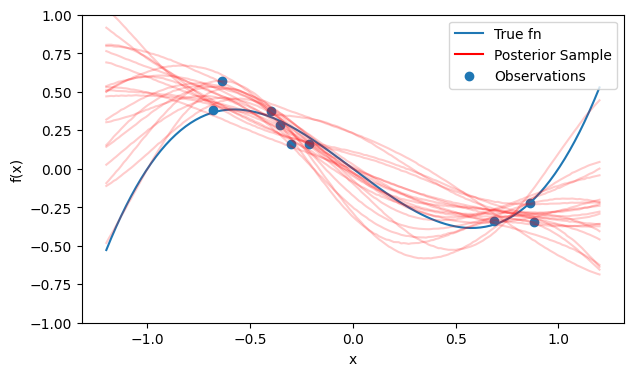

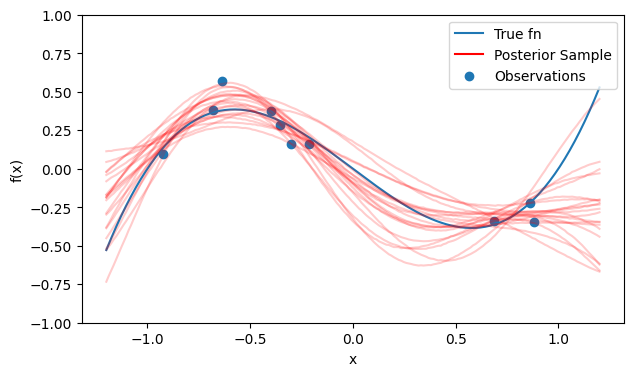

In [45]:
num_obs_err = 20

my_seed_err = np.random.default_rng(seed=914)

# cub_obs_vals_err = cub_obs_vals + my_seed.normal(
#         scale=0.1, size=num_obs_err
#     )

def cub_fn_err(x):
    return x[..., 0] * (x[..., 0] - 1) * (x[..., 0] + 1) + my_seed_err.normal(
        scale=0.1, size=x.shape[0]
    )


cub_obs_vals_err = cub_fn_err(cub_index_vals)

for ind in range(ind_range):
    gprm = tfd.GaussianProcessRegressionModel(
        kernel=optimized_kernel,
        index_points=predictive_index_points_,
        observation_index_points=cub_index_vals[range(ind + 1)],
        observations=cub_obs_vals_err[range(ind + 1)],
        observation_noise_variance=tf.Variable(
            0.01, dtype=np.float64, name="observation_noise_variance_err"
        ),
        predictive_noise_variance=0.0,
    )

    samples = gprm.sample(num_samples, seed=sampling_seed)

    plt.figure(figsize=(7, 4))
    plt.plot(
        predictive_index_points_, cub_fn(predictive_index_points_), label="True fn"
    )
    for i in range(num_samples):
        plt.plot(
            predictive_index_points_,
            samples[i, :],
            c="r",
            alpha=0.2,
            label="Posterior Sample" if i == 0 else None,
        )
    plt.scatter(
        cub_index_vals[range(ind + 1)],
        cub_obs_vals_err[range(ind + 1)],
        label="Observations",
    )
    leg = plt.legend(loc="upper right")
    for lh in leg.legend_handles:
        lh.set_alpha(1)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.ylim(-1, 1)
    # plt.title(r"Function estimation with GP")
    plt.savefig("write_up/images/cub_GP_err_" + str(ind + 1) + "_iters.pdf")
    plt.show()

In [46]:
UCB_index_points = np.array([[0.0]])
UCB_obs_points = cub_fn_err(UCB_index_points)

next_point = tfp.util.TransformedVariable(
    initial_value=0, bijector=tfb.Sigmoid(-1.0, 1.0), dtype=np.float64
)

UCB_GP_reg = tfd.GaussianProcessRegressionModel(
    kernel=optimized_kernel,
    observation_index_points=UCB_index_points,
    observations=UCB_obs_points,
    observation_noise_variance=tf.Variable(
        0.01, dtype=np.float64, name="observation_noise_variance_err"
    ),
)


def UCB_loss(next_point, GP_reg):
    mean_t = GP_reg.mean_fn(next_point)
    std_t = GP_reg.stddev(index_points=next_point)
    return tf.squeeze(mean_t - std_t)

UCB_loss(next_point, GP_reg)

InvalidArgumentError: cannot compute Sub as input #1(zero-based) was expected to be a double tensor but is a float tensor [Op:Sub] name: 

In [47]:
UCB_index_points = np.array([[0.0]])
UCB_obs_points = cub_fn_err(UCB_index_points)

next_point = tfp.util.TransformedVariable(
    initial_value=0, bijector=tfb.Sigmoid(-1.0, 1.0), dtype=np.float64
)

UCB_GP_reg = tfd.GaussianProcessRegressionModel(
    kernel=optimized_kernel,
    observation_index_points=UCB_index_points,
    observations=UCB_obs_points,
    observation_noise_variance=tf.Variable(
        0.01, dtype=np.float64, name="observation_noise_variance_err"
    ),
)


def UCB_loss(next_point, GP_reg):
    mean_t = GP_reg.mean_fn(next_point)
    std_t = GP_reg.stddev(index_points=next_point)
    return tf.squeeze(mean_t - std_t)

UCB_loss(next_point, UCB_GP_reg)

InvalidArgumentError: cannot compute Sub as input #1(zero-based) was expected to be a double tensor but is a float tensor [Op:Sub] name: 

In [48]:
next_point = tfp.util.TransformedVariable(
    initial_value=0, bijector=tfb.Sigmoid(-1.0, 1.0), dtype=np.float64
)

InvalidArgumentError: cannot compute Sub as input #1(zero-based) was expected to be a double tensor but is a float tensor [Op:Sub] name: 

In [49]:
UCB_index_points = np.array([[0.0]])
UCB_obs_points = cub_fn_err(UCB_index_points)

next_point = tfp.util.TransformedVariable(
    initial_value=0, bijector=tfb.Sigmoid(np.float64(-1.0), np.float64(1.0)), dtype=np.float64
)

UCB_GP_reg = tfd.GaussianProcessRegressionModel(
    kernel=optimized_kernel,
    observation_index_points=UCB_index_points,
    observations=UCB_obs_points,
    observation_noise_variance=tf.Variable(
        0.01, dtype=np.float64, name="observation_noise_variance_err"
    ),
)

def UCB_loss(next_point, GP_reg):
    mean_t = GP_reg.mean_fn(next_point)
    std_t = GP_reg.stddev(index_points=next_point)
    return tf.squeeze(mean_t - std_t)

UCB_loss(next_point, UCB_GP_reg)

2024-05-09 10:34:28.340063: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at reduction_ops_common.h:147 : INVALID_ARGUMENT: Invalid reduction dimension (-1 for input with 0 dimension(s)
2024-05-09 10:34:28.340134: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Invalid reduction dimension (-1 for input with 0 dimension(s)


InvalidArgumentError: {{function_node __wrapped__Sum_device_/job:localhost/replica:0/task:0/device:CPU:0}} Invalid reduction dimension (-1 for input with 0 dimension(s) [Op:Sum] name: 

In [50]:
next_point = tfp.util.TransformedVariable(
    initial_value=0, bijector=tfb.Sigmoid(np.float64(-1.0), np.float64(1.0)), dtype=np.float64
)

In [51]:
next_point

<TransformedVariable: name=sigmoid, dtype=float64, shape=[], fn="sigmoid", numpy=0.0>

In [52]:
UCB_GP_reg = tfd.GaussianProcessRegressionModel(
    kernel=optimized_kernel,
    observation_index_points=UCB_index_points,
    observations=UCB_obs_points,
    observation_noise_variance=tf.Variable(
        0.01, dtype=np.float64, name="observation_noise_variance_err"
    ),
)

In [53]:
def UCB_loss(next_point, GP_reg):
    mean_t = GP_reg.mean_fn(next_point)
    std_t = GP_reg.stddev(index_points=next_point)
    return tf.squeeze(mean_t - std_t)

In [54]:
UCB_GP_reg.mean_fn(next_point)

2024-05-09 10:35:24.910323: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at reduction_ops_common.h:147 : INVALID_ARGUMENT: Invalid reduction dimension (-1 for input with 0 dimension(s)
2024-05-09 10:35:24.910374: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Invalid reduction dimension (-1 for input with 0 dimension(s)


InvalidArgumentError: {{function_node __wrapped__Sum_device_/job:localhost/replica:0/task:0/device:CPU:0}} Invalid reduction dimension (-1 for input with 0 dimension(s) [Op:Sum] name: 

In [55]:
UCB_GP_reg.mean_fn(0)

2024-05-09 10:35:45.391723: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at reduction_ops_common.h:147 : INVALID_ARGUMENT: Invalid reduction dimension (-1 for input with 0 dimension(s)
2024-05-09 10:35:45.391800: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Invalid reduction dimension (-1 for input with 0 dimension(s)


InvalidArgumentError: {{function_node __wrapped__Sum_device_/job:localhost/replica:0/task:0/device:CPU:0}} Invalid reduction dimension (-1 for input with 0 dimension(s) [Op:Sum] name: 

In [56]:
UCB_GP_reg.mean_fn(0.)

2024-05-09 10:35:49.921351: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at reduction_ops_common.h:147 : INVALID_ARGUMENT: Invalid reduction dimension (-1 for input with 0 dimension(s)
2024-05-09 10:35:49.921404: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Invalid reduction dimension (-1 for input with 0 dimension(s)


InvalidArgumentError: {{function_node __wrapped__Sum_device_/job:localhost/replica:0/task:0/device:CPU:0}} Invalid reduction dimension (-1 for input with 0 dimension(s) [Op:Sum] name: 

In [57]:
UCB_GP_reg.mean_fn(np.array(0.))

2024-05-09 10:35:58.039749: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at reduction_ops_common.h:147 : INVALID_ARGUMENT: Invalid reduction dimension (-1 for input with 0 dimension(s)
2024-05-09 10:35:58.039853: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Invalid reduction dimension (-1 for input with 0 dimension(s)


InvalidArgumentError: {{function_node __wrapped__Sum_device_/job:localhost/replica:0/task:0/device:CPU:0}} Invalid reduction dimension (-1 for input with 0 dimension(s) [Op:Sum] name: 

In [58]:
UCB_GP_reg.mean_fn(np.array([0.]))

2024-05-09 10:36:11.068316: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: In[0] and In[1] has different ndims: [1] vs. [1,1]


InvalidArgumentError: {{function_node __wrapped__MatMul_device_/job:localhost/replica:0/task:0/device:CPU:0}} In[0] and In[1] has different ndims: [1] vs. [1,1] [Op:MatMul] name: 

In [59]:
UCB_GP_reg.mean_fn(np.array([[0.]]))

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([-0.04867436])>

In [60]:
UCB_index_points = np.array([[0.0]])
UCB_obs_points = cub_fn_err(UCB_index_points)

next_point = tfp.util.TransformedVariable(
    initial_value=0,
    bijector=tfb.Sigmoid(np.float64(-1.0), np.float64(1.0)),
    dtype=np.float64,
)

UCB_GP_reg = tfd.GaussianProcessRegressionModel(
    kernel=optimized_kernel,
    observation_index_points=UCB_index_points,
    observations=UCB_obs_points,
    observation_noise_variance=tf.Variable(
        0.01, dtype=np.float64, name="observation_noise_variance_err"
    ),
)


def UCB_loss(next_point, GP_reg):
    mean_t = GP_reg.mean_fn(np.array([[next_point]]))
    std_t = GP_reg.stddev(index_points=next_point)
    return tf.squeeze(mean_t - std_t)


UCB_loss(next_point, UCB_GP_reg)

ValueError: setting an array element with a sequence.

In [61]:
UCB_GP_reg.mean_fn(np.array([[next_point]]))

ValueError: setting an array element with a sequence.

In [62]:
UCB_GP_reg.mean_fn(np.array([next_point]))

ValueError: setting an array element with a sequence.

In [63]:
UCB_GP_reg.mean_fn(np.array(next_point.numpy()))

2024-05-09 10:37:46.641517: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at reduction_ops_common.h:147 : INVALID_ARGUMENT: Invalid reduction dimension (-1 for input with 0 dimension(s)
2024-05-09 10:37:46.641570: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Invalid reduction dimension (-1 for input with 0 dimension(s)


InvalidArgumentError: {{function_node __wrapped__Sum_device_/job:localhost/replica:0/task:0/device:CPU:0}} Invalid reduction dimension (-1 for input with 0 dimension(s) [Op:Sum] name: 

In [64]:
UCB_GP_reg.mean_fn(np.array([[next_point.numpy()]]))

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([0.1943342])>

In [65]:
UCB_GP_reg.mean_fn(np.array([[0]]))

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([0.1943342])>

In [66]:
next_point = tfp.util.TransformedVariable(
    initial_value=0.5,
    bijector=tfb.Sigmoid(np.float64(-1.0), np.float64(1.0)),
    dtype=np.float64,
)

In [67]:
UCB_GP_reg.mean_fn(np.array([[next_point.numpy()]]))

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([0.15313639])>

In [68]:
UCB_GP_reg.mean_fn(np.array([[0.5]]))

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([0.15313639])>

In [69]:
UCB_GP_reg.stddev(np.array([[0.5]]))

ValueError: name for name_scope must be a string.

In [70]:
UCB_GP_reg.stddev(np.array([0.5]))

ValueError: name for name_scope must be a string.

In [71]:
UCB_GP_reg.stddev(index_points = np.array([0.5]))

IndexError: tuple index out of range

In [72]:
UCB_GP_reg.stddev(index_points = np.array([[0.5]]))

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([0.60558418])>

In [73]:
UCB_index_points = np.array([[0.0]])
UCB_obs_points = cub_fn_err(UCB_index_points)

next_point = tfp.util.TransformedVariable(
    initial_value=0.5,
    bijector=tfb.Sigmoid(np.float64(-1.0), np.float64(1.0)),
    dtype=np.float64,
)

UCB_GP_reg = tfd.GaussianProcessRegressionModel(
    kernel=optimized_kernel,
    observation_index_points=UCB_index_points,
    observations=UCB_obs_points,
    observation_noise_variance=tf.Variable(
        0.01, dtype=np.float64, name="observation_noise_variance_err"
    ),
)


def UCB_loss(next_point, GP_reg):
    mean_t = GP_reg.mean_fn(np.array([[next_point]]))
    std_t = GP_reg.stddev(index_points=np.array([[next_point]]))
    return tf.squeeze(mean_t - std_t)


UCB_loss(next_point, UCB_GP_reg)

ValueError: setting an array element with a sequence.

In [74]:
UCB_GP_reg.mean_fn(np.array([[next_point]]))

ValueError: setting an array element with a sequence.

In [75]:
UCB_GP_reg.mean_fn(np.array([[0.5]]))

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([0.02316851])>

In [76]:
UCB_index_points = np.array([[0.0]])
UCB_obs_points = cub_fn_err(UCB_index_points)

next_point = tfp.util.TransformedVariable(
    initial_value=0.5,
    bijector=tfb.Sigmoid(np.float64(-1.0), np.float64(1.0)),
    dtype=np.float64,
)

UCB_GP_reg = tfd.GaussianProcessRegressionModel(
    kernel=optimized_kernel,
    observation_index_points=UCB_index_points,
    observations=UCB_obs_points,
    observation_noise_variance=tf.Variable(
        0.01, dtype=np.float64, name="observation_noise_variance_err"
    ),
)


def UCB_loss(next_point, UCB_GP_reg):
    mean_t = UCB_GP_reg.mean_fn(np.array([[next_point.numpy()]]))
    std_t = UCB_GP_reg.stddev(index_points=np.array([[next_point.numpy()]]))
    return tf.squeeze(mean_t - std_t)


UCB_loss(next_point, UCB_GP_reg)

<tf.Tensor: shape=(), dtype=float64, numpy=-0.5706078801452475>